Antonio Fernandes Valadares 11711ECP015

Universidade Federal de Uberlândia \\
Engenharia de Computação


In [ ]:
import random
import string
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

População inicial de valores de 0 a 1024 para representação binária

In [ ]:
initial_population = np.random.choice(np.arange(0,1024), replace=False, size=(50))

In [ ]:
initial_population.shape

(50,)

In [ ]:
initial_population

array([ 391,  413, 1009,   75,  540,  506,  719,  324,  321,  895,  589,
         88,  449,  127,  824,  439,  209,  524,  951,  317,   52,  687,
        523, 1016,  546,  716,   64,  210,  229,  879,  839,  487,  796,
        578,  238,   84,  950,  955,  510,  384,  214,  452,  862,  945,
        200,  660,  490,  708,  906,  580])

Função a ser minimizada:

In [ ]:
def f(x):
  return  (-1 * np.abs(x * math.sin(math.sqrt(np.abs(x)) ) )) + 419

Gráfico da função:

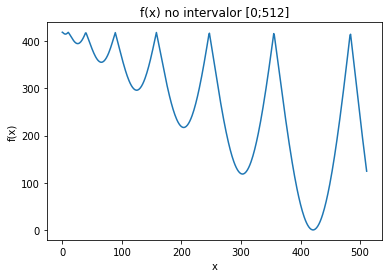

In [ ]:
lista = []
for x in range(0,512):
  lista.append(f(x))

plt.title('f(x) no intervalor [0;512]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(lista, label='x')
plt.show()

Calcula o fitness de toda população:

In [ ]:
#population = initial_population/2


def fitness_calculate(population): 


  fitness = np.vectorize(f)(population)


  return fitness



#fitness = fitness_calculate(population)
#fitness
#S = fitness.sum()

Ordena os indivíduos por fitness e retorna um array de duas dimensões com o valor do indivíduo e seu fitness, além disso exibe o melhor resultado.

In [ ]:
def best_result(population, fitness):
  result = np.column_stack((population, fitness))
  result = result[result[:, 1].argsort()]
  best = result[0]

  print("Melhor solução: ",best[0]," Melhor resultado: ", best[1])

  return result

#result = best_result(population, fitness)

Seleciona os melhores indivíduos utilizando o metódo da roleta

In [ ]:
def select(result, s):

  bin_population = []

  c = 0
  for element in result:
    c = (element[1]/s) + c


  for element in result:
    if(random.random() < c):
      bin_population.append("{0:010b}".format(int(element[0]*2)))
    c = c - element[1]/s


  return bin_population


def select_individuals(result):
  select_ind = result[0:25, 0] * 2
  bin_population = ["{0:010b}".format(int(x)) for x in select_ind]
  
  return bin_population

#bin_population = select(result, fitness.sum())


Realiza o crossover entre os indivíduos selecionados, cada crossover resulta em 2 filhos.

In [ ]:
def crossover(population):
  new_population = []

  #for element in population:
  new_population.append(population[0])


  while(len(new_population) < 50):  
    p1 = random.choice(population)
    p2 = random.choice(population)

    i = random.randint(0,10)

    f1 = p1[0:i] + p2[i:10]
    f2 = p2[0:i] + p1[i:10]

    new_population.append(f1)
    new_population.append(f2)

  #for i in range(0, 5):
    #new_population.append("{0:010b}".format(int(random.randint(0,1024))))

  return new_population


#crossover(bin_population)


Converte strings binárias para números inteiros


In [ ]:
def converte_bin(population):
  float_population = []

  for element in population:
    float_population.append(int(element, 2))

  return float_population

Aplica uma probabildade de mutação a toda população:


In [ ]:
def mutation(population):
  new_population = []

  for element in population:
    if(random.random() < 0.05):
      new_element = list(element)
      pos = random.randint(0,9)
      if  (new_element[pos] == '1'):
        new_element[pos] = '0'
      else:
        new_element[pos] = '1'
      new_population.append(''.join(new_element))
    else:
      new_population.append(element)
  return new_population


In [ ]:
def genetic_algorithm(initial_population, geracoes=100):
  
  i = 0
  
  
  while(i<geracoes):

    print("Geração: ", i+1)

    population = initial_population/2

    fitness = fitness_calculate(population)


    print("Média de Fitness: ", fitness.sum()/50)

    result = best_result(population, fitness)

    select_population = select(result, fitness.sum())

    new_population = crossover(select_population)

    new_population = mutation(new_population)

    initial_population = converte_bin(new_population)

    initial_population = np.array(initial_population)

    i = i + 1


In [ ]:
genetic_algorithm(initial_population, geracoes=100)

Geração:  1
Média de Fitness:  274.93684804549173
Melhor solução:  419.5  Melhor resultado:  0.2891344519273389
Geração:  2
Média de Fitness:  205.22424260655637
Melhor solução:  421.5  Melhor resultado:  0.05273233434513713
Geração:  3
Média de Fitness:  196.6858837804629
Melhor solução:  421.5  Melhor resultado:  0.05273233434513713
Geração:  4
Média de Fitness:  133.44616332961172
Melhor solução:  421.5  Melhor resultado:  0.05273233434513713
Geração:  5
Média de Fitness:  70.86995690372329
Melhor solução:  421.5  Melhor resultado:  0.05273233434513713
Geração:  6
Média de Fitness:  48.85355132311528
Melhor solução:  421.5  Melhor resultado:  0.05273233434513713
Geração:  7
Média de Fitness:  43.473576367595705
Melhor solução:  421.5  Melhor resultado:  0.05273233434513713
Geração:  8
Média de Fitness:  15.301644943619443
Melhor solução:  421.5  Melhor resultado:  0.05273233434513713
Geração:  9
Média de Fitness:  15.274760180711237
Melhor solução:  421.5  Melhor resultado:  0.05273